In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rc('font', family='AppleGothic') # Ïï†Ìîå Ìè∞Ìä∏ ÏÇ¨Ïö©
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ ÏïàÍπ®ÏßÄÍ≤å ÏÑ§Ï†ï

In [2]:
test = pd.read_csv("../../data/raw/test.csv")
train = pd.read_csv("../../data/raw/train.csv")

In [3]:
test.head()

ID  ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò Ïù∏ÏàòÏó¨Î∂Ä ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  \
0  TEST_0000  2002  CT010   ÌïÄÌÖåÌÅ¨  Series C  3261.0   No  Yes      45.0   
1  TEST_0001  2020  CT001  Ìë∏ÎìúÌÖåÌÅ¨  Series C  3707.0  Yes   No      70.0   
2  TEST_0002  2014  CT006  ÏóêÎìÄÌÖåÌÅ¨       IPO   236.0  Yes  Yes      89.0   
3  TEST_0003  2003  CT001   ÏóêÎÑàÏßÄ      Seed   637.0  Yes  Yes      17.0   
4  TEST_0004  2006  CT010   ÌïÄÌÖåÌÅ¨      Seed  4922.0  Yes   No      68.0   

   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  
0     5021.0   6680.0            2.00  1500-2500  
1     1601.0   4654.0            4.20        NaN  
2     4709.0   9289.0            1.00     6000Ïù¥ÏÉÅ  
3     2145.0   7005.0            5.00  1500-2500  
4     4995.0   7593.0            4.36        NaN

In [4]:
train.head()

ID  ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò Ïù∏ÏàòÏó¨Î∂Ä ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  \
0  TRAIN_0000  2009  CT005  Ïù¥Ïª§Î®∏Ïä§  Series A  4126.0   No   No      56.0   
1  TRAIN_0001  2023  CT006   ÌïÄÌÖåÌÅ¨      Seed  4167.0  Yes   No      80.0   
2  TRAIN_0002  2018  CT007    Í∏∞Ïà†  Series A  3132.0  Yes  Yes      54.0   
3  TRAIN_0003  2016  CT006   NaN      Seed  3245.0  Yes  Yes       NaN   
4  TRAIN_0004  2020  CT002  ÏóêÎìÄÌÖåÌÅ¨      Seed  1969.0   No  Yes      94.0   

   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  
0     3365.0   4764.0            4.71        NaN   0.3  
1     4069.0    279.0            1.00  2500-3500   0.8  
2     6453.0  12141.0            4.00  3500-4500   0.5  
3      665.0  10547.0            2.97        NaN   0.7  
4      829.0   9810.0            1.00  1500-2500   0.1

# EDA

In [5]:
train.describe()

ÏÑ§Î¶ΩÏó∞ÎèÑ         ÏßÅÏõê Ïàò     Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)    Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       Ïó∞Îß§Ï∂ú(ÏñµÏõê)  \
count  4376.000000  4202.000000  3056.000000  4376.000000   4376.000000   
mean   2012.006856  2471.324369    49.214332  3314.568556   6452.202239   
std       6.554872  1446.064215    27.141242  1880.103831   3782.792656   
min    2001.000000     5.000000     1.000000    12.000000     12.000000   
25%    2006.000000  1218.250000    27.000000  1651.500000   3094.250000   
50%    2012.000000  2472.000000    49.000000  3398.000000   6478.500000   
75%    2018.000000  3727.500000    72.000000  4908.250000   9692.500000   
max    2023.000000  4998.000000    99.000000  7059.000000  14822.000000   

       SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)         ÏÑ±Í≥µÌôïÎ•†  
count     4376.000000  4376.000000  
mean         2.578103     0.537340  
std          1.414590     0.241698  
min          0.000000     0.100000  
25%          1.320000     0.400000  
50%          2.835000     0.600000  
75%          4.000000     0.700000  
max          5.000000     0.900000

In [6]:
train.isna().sum()

ID                   0
ÏÑ§Î¶ΩÏó∞ÎèÑ                 0
Íµ≠Í∞Ä                   0
Î∂ÑÏïº                 857
Ìà¨ÏûêÎã®Í≥Ñ                 0
ÏßÅÏõê Ïàò               174
Ïù∏ÏàòÏó¨Î∂Ä                 0
ÏÉÅÏû•Ïó¨Î∂Ä                 0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)          1320
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)            0
Ïó∞Îß§Ï∂ú(ÏñµÏõê)              0
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)       0
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         1220
ÏÑ±Í≥µÌôïÎ•†                 0
dtype: int64

In [7]:
train.isna().sum() / len(train)
# Í∞Å Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®

ID                0.000000
ÏÑ§Î¶ΩÏó∞ÎèÑ              0.000000
Íµ≠Í∞Ä                0.000000
Î∂ÑÏïº                0.195841
Ìà¨ÏûêÎã®Í≥Ñ              0.000000
ÏßÅÏõê Ïàò              0.039762
Ïù∏ÏàòÏó¨Î∂Ä              0.000000
ÏÉÅÏû•Ïó¨Î∂Ä              0.000000
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)          0.301645
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)         0.000000
Ïó∞Îß§Ï∂ú(ÏñµÏõê)           0.000000
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)    0.000000
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         0.278793
ÏÑ±Í≥µÌôïÎ•†              0.000000
dtype: float64

---
### 1. Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)Ïùò countÍ∞Ä Îã§Î•∏ Ïª¨ÎüºÎ≥¥Îã§ Ï†ÅÎã§.   
### 2. SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö) Ïùò Í∞íÏù¥ 0 Ïù∏ Î∂ÄÎ∂ÑÏùÄ Í≤∞Ï∏°ÏπòÎ°ú Î≥∏Îã§ -> Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞Ï§Ä Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ ÌôçÎ≥¥ Î∞©Î≤ïÏù¥ snsÎ°ú ÌåêÎã®Ìï®
### 3. Ïó∞Îß§Ï∂ú, Ìà¨ÏûêÍ∏àÏùÑ ÏÇ¨Ïö©Ìï¥ ÏàòÏùµÏÑ± Î∂ÑÏÑùÏùÑ ÏãúÎèÑÌï†ÏàòÏûàÏùå.

ÌååÏÉù Î≥ÄÏàò ÎßåÎì§Ïñ¥Î≥ºÎßåÌïúÎìØ?  
1. Í∏∞ÏóΩ_Ïó∞Î†π : Ïã†Î¢∞ÎèÑ, ÏÉùÏ°¥Î†• -> ÏñºÎßàÎÇò ÏÇ¨ÏóÖÏù¥ ÏïàÏ†ïÏ†ÅÏù∏ÏßÄ? - Í∏∞Ï§ÄÏùÄ 2025ÎÖÑÏúºÎ°ú ÌïúÎã§.  
    ( Ïñ¥Îäê ÎÖÑÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏÇ∞Ìï†ÏßÄ Î¨∏ÏùòÎ•º ÎÇ®Í≤ºÏßÄÎßå ÏïåÏïÑÏÑú ÌåêÎã®ÌïòÎùºÍ≥† ÎãµÏû•Ïò¥. )

3. ÏßÅÏõêÎãπ Îß§Ï∂ú : ÏÉùÏÇ∞ÏÑ± -> ÏÇ¨Îûå 1Î™ÖÎãπ ÏñºÎßàÎÇò Î≤åÏñ¥Îì§Ïù¥ÎäîÏßÄÎ•º ÏùòÎØ∏, Ìö®Ïú®ÏÑ±Ïù¥ ÎÜíÏùÑÏàòÎ°ù Í∏∞ÏóÖ Ï≤¥Í≥ÑÍ∞Ä Ïûò Ïû°ÌòîÎã§
4. Í≥†Í∞ùÎãπ Îß§Ï∂ú : Í≥†Í∞ù Ïßà -> ÏàòÏùµÏÑ±ÏùÑ ÎÇòÌÉÄÎÉÑ
5. Ìà¨ÏûêÎã®Í≥Ñ : ÏÑ±Ïû• Îã®Í≥Ñ -> Ìà¨ÏûêÎã®Í≥Ñ Ï∞®Ï†úÍ∞Ä ÏãúÏóÖ ÏÑ±Ïû•Ïùò Ï≤ôÎèÑÏù¥Îã§. Îí§Î°ú Í∞àÏàòÎ°ù Í≤ÄÏ¶ùÎêú Í∏∞ÏóÖÏù¥ÎùºÎäî ÏùòÎØ∏ (ÏàúÏÑúÌòï Î≥ÄÏàòÎ°ú Ïù∏ÏΩîÎî©)
6. Ïù∏ÏàòÏó¨Î∂Ä_x_Ìà¨ÏûêÎã®Í≥Ñ : Ïñ¥Îäê Ìà¨Ïûê Îã®Í≥ÑÏóêÏÑú Ïù∏ÏàòÌñàÎäîÏßÄ? -> Ï¥àÍ∏∞Îã®Í≥ÑÏóê Ïù∏ÏàòÎê†ÏàòÎ°ù ÏàòÏùµÏÑ± ÎÜíÏùÄ ÏÇ¨ÏóÖÏù¥ÎùºÍ≥† ÌåêÎã®Ìï®

ÌååÏÉùÎ≥ÄÏàòÎäî Î®ºÏ†Ä Ï†ÑÏ≤òÎ¶¨Î•º Ìïú Îí§Ïóê ÌîºÏ≤òÏ§ëÏöîÎèÑÎ°ú ÌåêÎã®ÌïòÏûê!

In [8]:
train['ÏÑ§Î¶ΩÏó∞ÎèÑ'].describe()

count    4376.000000
mean     2012.006856
std         6.554872
min      2001.000000
25%      2006.000000
50%      2012.000000
75%      2018.000000
max      2023.000000
Name: ÏÑ§Î¶ΩÏó∞ÎèÑ, dtype: float64

In [9]:
# 2001 ~ 2023ÎÖÑÍπåÏßÄ Îπ†ÏßÑ ÎÖÑÎèÑÏûàÎÇò ÌôïÏù∏
year = train['ÏÑ§Î¶ΩÏó∞ÎèÑ'].unique()
year.sort()
print(year)

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023]


ÎàÑÎùΩÎêú Ïó∞ÎèÑ ÏóÜÏù¥ Î™®Îëê Ïûò Ìè¨Ìï®Îê®. Í≤∞Ï∏°Ïπò ÏóÜÏùåÏùÑ ÌôïÏù∏ÌïòÍ≥† Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†• ÏòàÏ†ï

In [10]:
train['Íµ≠Í∞Ä'].unique()
# Íµ≠Í∞ÄÏΩîÎìúÎäî Í≥µÏãùÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Î¨∏ÏûêÍ∞Ä ÏïÑÎãå Îî∞Î°ú ÏÇ¨Ïö©ÌïòÎäî ÎπÑÍ≥µÏãùÏ†ÅÏù∏ ÏΩîÎìúÎ°ú Î≥¥ÏûÑ
# Í≤∞Ï∏°Ïπò ÏóÜÏùå, Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©(Ïõê Ìï´ Ïù∏ÏΩîÎî©) ÏÇ¨Ïö© ÏòàÏ†ï
# Îç∞Ïù¥ÌÑ∞Ïùò ÏàúÏÑúÍ∞Ä ÏóÜÏùåÏúºÎ°ú Ïõê Ìï´ Ïù∏ÏΩîÎî© ÏÇ¨Ïö©ÏúºÎ°ú Í≤∞Ï†ï

array(['CT005', 'CT006', 'CT007', 'CT002', 'CT008', 'CT010', 'CT001',
       'CT009', 'CT003', 'CT004'], dtype=object)

In [11]:
print(f"Î∂ÑÏïºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú® : {(train['Î∂ÑÏïº'].isnull().sum() / len(train['Î∂ÑÏïº'])) * 100:.2f}%")

Î∂ÑÏïºÏùò Í≤∞Ï∏°Ïπò ÎπÑÏú® : 19.58%


In [12]:
train['Î∂ÑÏïº'].unique()
# Í≤∞Ï∏°Ïπò ÎπÑÏú®Ïù¥ 20%ÏûÑ. -> Ï†ÅÏùÄ ÏàòÏ§ÄÏù∏Í∞Ä? -> Ï†ÅÏùÄ ÏàòÏ§ÄÏù¥ÎùºÍ≥† ÌåêÎã®Ìï®.
# Ïà´ÏûêÌòïÏù¥ ÏïÑÎãàÎØÄÎ°ú UnknownÏúºÎ°ú ÎåÄÏ≤¥Ìï† ÏòàÏ†ïÏûÑ
# ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏàúÏÑúÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê One Hot encodingÏúºÎ°ú Ìï† ÏòàÏ†ï
# Ïª¨ÎüºÏù¥ ÎÑàÎ¨¥ ÎßéÏù¥ ÏÉùÍ∏∞ÎäîÍ±∞ ÏïÑÎãåÍ∞Ä? -> Ïª¨ÎüºÏù¥ Ï¥ù 11Í∞ú ÏÉùÏÑ±ÎêòÏßÄÎßå Î™®Îç∏ ÌïôÏäµÏóê ÌÅ∞ ÏòÅÌñ•ÏùÄ ÏóÜÎã§Í≥† Í∞úÏù∏Ï†ÅÏù∏ ÌåêÎã®
# 30 ~ 50 Í∞ú Î∂ÄÌÑ∞ Î¨∏Ï†ú ÏÉùÍπÄ

array(['Ïù¥Ïª§Î®∏Ïä§', 'ÌïÄÌÖåÌÅ¨', 'Í∏∞Ïà†', nan, 'ÏóêÎìÄÌÖåÌÅ¨', 'Í≤åÏûÑ', 'Ìó¨Ïä§ÏºÄÏñ¥', 'Î¨ºÎ•ò', 'Ìë∏ÎìúÌÖåÌÅ¨', 'AI',
       'ÏóêÎÑàÏßÄ'], dtype=object)

In [13]:
train['Ìà¨ÏûêÎã®Í≥Ñ'].unique()
# Ìà¨Ïûê Îã®Í≥ÑÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏùå
# Ïù¥Í±¥ ÏàúÏÑúÍ∞Ä ÏûàÏúºÎãà Label encoding Í∞ÄÎä•ÌïúÍ∞Ä? -> ÏßÅÏ†ë ÎßµÌïëÌïòÏûê
# Seed : Series A : Series B : Series C : IPO ÏàúÏÑúÎ°ú ÎÇòÏó¥ Í∞ÄÎä•Ìï®?
# Label encoding Î¨∏Ï†úÏ†êÏù¥ ÏûàÎäîÍ±∏Î°ú Î≥¥ÏûÑ -> Oridinal Encoding ÎπÑÍµêÌï¥Î¥êÏïºÌï†ÎìØ 
# Î™®Îç∏Ïóê Îî∞Îùº Ïù∏ÏΩîÎî©Ïù¥ Îã¨ÎùºÏßàÎìØ

array(['Series A', 'Seed', 'Series C', 'Series B', 'IPO'], dtype=object)

In [14]:
train['Ïù∏ÏàòÏó¨Î∂Ä'].unique()
# Î≤îÏ£ºÌòïÏûÑ One-hot encoding
# Í≤∞Ï∏°ÏπòÎèÑ ÏóÜÎã§.
# Ìà¨ÏûêÎã®Í≥ÑÏôÄ ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Í∏∞

array(['No', 'Yes'], dtype=object)

In [15]:
train['ÏÉÅÏû•Ïó¨Î∂Ä'].unique()
# Î≤îÏ£ºÌòïÏù∏ One-hot encoding

array(['No', 'Yes'], dtype=object)

In [16]:
train['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)']
# Í≤∞Ï∏°ÏπòÎèÑ ÏóÜÍ≥† ÍπîÎÅîÌïú ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïù∏ÎìØ
# Íµ≥Ïù¥ floatÏúºÎ°ú Ï≤òÎ¶¨Ìï¥ÏïºÌïòÎÇò? Ï†ïÏàòÌòïÏù¥ Îçî Ï†ÅÏùÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©?

0       3365.0
1       4069.0
2       6453.0
3        665.0
4        829.0
         ...  
4371    4187.0
4372     796.0
4373    3314.0
4374    2395.0
4375     903.0
Name: Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê), Length: 4376, dtype: float64

In [17]:
# ÏÜåÏàòÏ†ê Ïù¥ÌïòÍ∞Ä 0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàò
# ÏóÜÏúºÎãàÍπê Í∑∏ÎÉ• Ï†ïÏàòÌòïÏ≤òÎ¶¨Î°ú ÌïúÎã§.
count = (train["Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)"] % 1 != 0).sum()
print(count)

0


In [18]:
train['Ïó∞Îß§Ï∂ú(ÏñµÏõê)']
# Í≤∞Ï∏°ÏπòÎèÑ ÏóÜÍ≥† ÍπîÎÅîÌïú ÏàòÏπòÌòï
# Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò Í≥†ÎØº?

0        4764.0
1         279.0
2       12141.0
3       10547.0
4        9810.0
         ...   
4371     9394.0
4372     2969.0
4373     4512.0
4374     3755.0
4375     9417.0
Name: Ïó∞Îß§Ï∂ú(ÏñµÏõê), Length: 4376, dtype: float64

In [19]:
# Ï†ïÏàòÎ°ú Î≥ÄÌôò ÌôïÏ†ï
count = (train['Ïó∞Îß§Ï∂ú(ÏñµÏõê)']%1 != 0).sum()
print(count)

0


In [20]:
train['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'].describe()

count    4376.000000
mean        2.578103
std         1.414590
min         0.000000
25%         1.320000
50%         2.835000
75%         4.000000
max         5.000000
Name: SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö), dtype: float64

In [34]:
percent = (train['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] == 0).sum() / len(train) * 100
print(f"ÌåîÎ°úÏõå ÏàòÍ∞Ä 0Ïù∏ ÎπÑÏú®: {percent:.2f}%")

ÌåîÎ°úÏõå ÏàòÍ∞Ä 0Ïù∏ ÎπÑÏú®: 4.18%


In [22]:
train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].unique()

array([nan, '2500-3500', '3500-4500', '1500-2500', '4500-6000', '6000Ïù¥ÏÉÅ'],
      dtype=object)

In [23]:
train['ÏÑ±Í≥µÌôïÎ•†']
# ÏÇ¨Ïö© Î™®Îç∏Ïóê Îî∞Îùº Ïä§ÏºÄÏùºÎßÅ Ìï¥ÏïºÌï†ÎìØ

0       0.3
1       0.8
2       0.5
3       0.7
4       0.1
       ... 
4371    0.8
4372    0.4
4373    0.6
4374    0.9
4375    0.6
Name: ÏÑ±Í≥µÌôïÎ•†, Length: 4376, dtype: float64

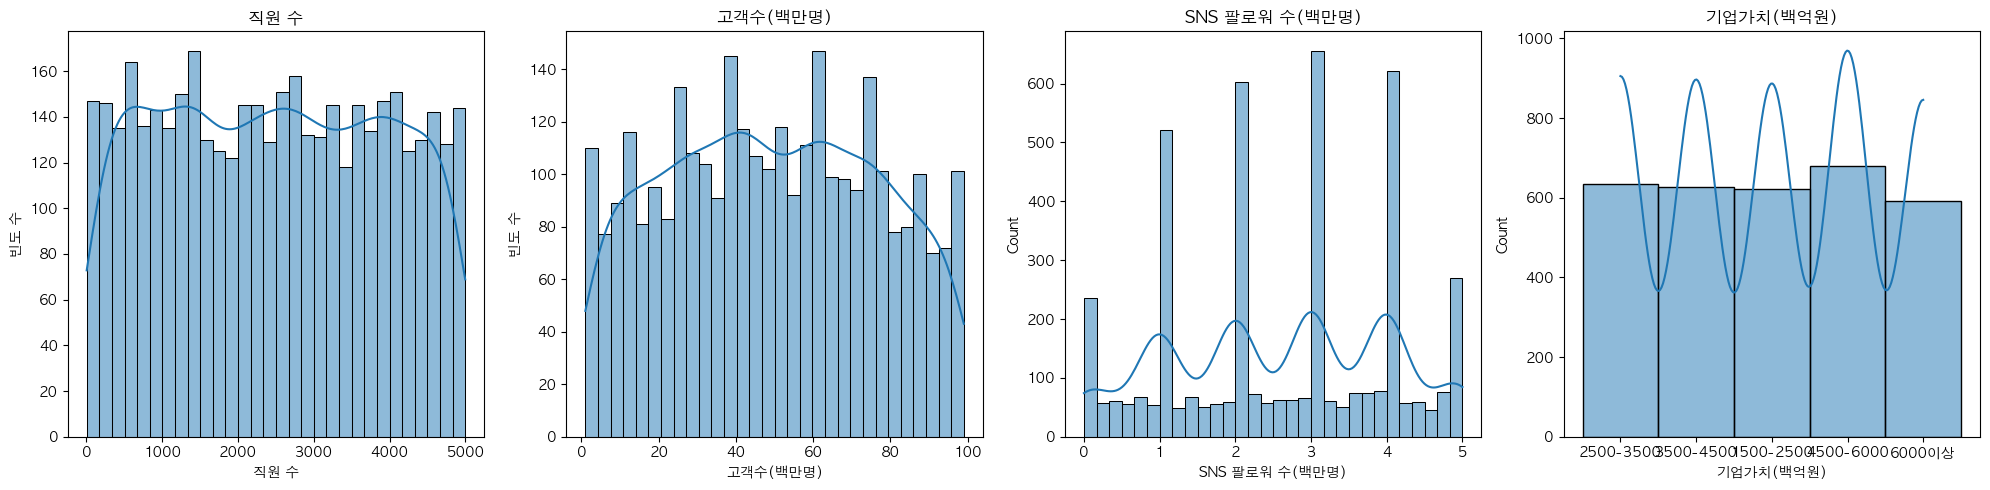

In [24]:
# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1Ìñâ 3Ïó¥

# ÏßÅÏõê Ïàò
sns.histplot(train['ÏßÅÏõê Ïàò'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('ÏßÅÏõê Ïàò')
axes[0].set_xlabel('ÏßÅÏõê Ïàò')
axes[0].set_ylabel('ÎπàÎèÑ Ïàò')

# Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)
sns.histplot(train['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)")
axes[1].set_ylabel('ÎπàÎèÑ Ïàò')

# SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)
sns.histplot(train['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)")

#Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)
sns.histplot(train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'], bins=30, kde=True)
axes[3].set_title('Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)')
plt.tight_layout()
plt.show


# ÏãúÍ∞ÅÌôî Í≤∞Í≥º Ï†ÄÏû•
plt.savefig('../../src/histograms.png', dpi=300, bbox_inches='tight')

plt.show()

ÏúÑÏóê Í∑∏ÎûòÌîÑÎäî Í≤∞Ï∏°ÏπòÎ•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄ ÌåêÎã®ÏùÑ ÏúÑÌïú Í∑∏ÎûòÌîÑÏûÑ  
ÏßÅÏõê ÏàòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÌèâÍ∑†ÏùÑ Ïù¥Î£®Î©∞ Í≥†Î•¥Í≤å Î∂ÑÌè¨ÎêòÏñ¥ÏûàÎã§. -> ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥  
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)ÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÏïôÏúºÎ°ú Î™∞Î¶º. -> Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥  
SNS ÌåîÎ°úÏõåÏàòÎäî Ïù∏ÏúÑÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Î°ú Î≥¥ÏûÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥  
Í∏∞ÏóÖÍ∞ÄÏπòÎäî ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ Ï†ïÎ¶¨

---
## üìå ÏÑ§Î¶ΩÏó∞ÎèÑ
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (Ï†ïÏàòÌòï)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê ÏÇ¨Ïö©
- **ÎπÑÍ≥†**: Í∏∞ÏóÖ ÎÇòÏù¥ Îì± ÌååÏÉùÎ≥ÄÏàòÎèÑ Ï∂îÌõÑ Í≥†Î†§ Í∞ÄÎä•

---

## üìå Íµ≠Í∞Ä
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï (ÏΩîÎìúÌòï Î¨∏ÏûêÏó¥)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Ïõê-Ìï´ Ïù∏ÏΩîÎî© (One-Hot Encoding)
- **ÎπÑÍ≥†**: ÏÇ¨ÎûåÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî Íµ≠Í∞ÄÎ™ÖÏù¥ ÏïÑÎãå ÏΩîÎìúÎ°ú ÌëúÌòÑÎê®

---

## üìå Î∂ÑÏïº
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï
- **Í≤∞Ï∏°Ïπò**: ÏûàÏùå ‚Üí `'Unknown'`ÏúºÎ°ú ÎåÄÏ≤¥
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Ïõê-Ìï´ Ïù∏ÏΩîÎî©
- **ÎπÑÍ≥†**: Í≥†Ïú†Í∞íÏù¥ ÎßéÏúºÎ©¥ top-N Ïù∏ÏΩîÎî© Í≥†Î†§ Í∞ÄÎä•

---

## üìå Ìà¨ÏûêÎã®Í≥Ñ
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï (ÏàúÏÑúÌòï)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Î™ÖÌôïÌïú ÏàúÏÑúÍ∞Ä ÏûàÏúºÎãà ÏßÅÏ†ë Ïà´ÏûêÎ•º Îß§Ìïë
- **ÎπÑÍ≥†**: **Î™®Îç∏ Ï¢ÖÎ•òÏóê Îî∞Îùº Ïù∏ÏΩîÎî© Ï†ÑÎûµ Îã¨ÎùºÏßà Ïàò ÏûàÏùå**

---

## üìå ÏßÅÏõê Ïàò
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (float ‚Üí int Í∞ÄÎä•)
- **Í≤∞Ï∏°Ïπò**: ÎÇÆÏùÄ ÎπÑÏú® ‚Üí ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
- **Î∂ÑÌè¨**: Í∑†Îì± Î∂ÑÌè¨, Ïù¥ÏÉÅÏπò ÏóÜÏùå, ÎåÄÏπ≠Ï†Å
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: `ÌèâÍ∑†(mean)`ÏúºÎ°ú ÎåÄÏ≤¥
- **ÎπÑÍ≥†**: ÌïÑÏöîÏãú Ï†ïÏàòÌòïÏúºÎ°ú ÌÉÄÏûÖ Ï∫êÏä§ÌåÖ Í≥†Î†§

---

## üìå Ïù∏ÏàòÏó¨Î∂Ä
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï (Ïòà/ÏïÑÎãàÏò§ ÎòêÎäî Y/N)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Ïõê-Ìï´ Ïù∏ÏΩîÎî©

---

## üìå ÏÉÅÏû•Ïó¨Î∂Ä
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï (ÏÉÅÏû• / ÎπÑÏÉÅÏû•)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Ïõê-Ìï´ Ïù∏ÏΩîÎî©

---

## üìå Í≥†Í∞ùÏàò (Î∞±ÎßåÎ™Ö)
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (float)
- **Í≤∞Ï∏°Ïπò**: ÎßéÏùå (ÏïΩ 30%)
- **Î∂ÑÌè¨**: Ï§ëÏïôÍ∞í Ï£ºÎ≥ÄÏóê Î∞ÄÏßëÎê®
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: `Ï§ëÏïôÍ∞í(median)`ÏúºÎ°ú ÎåÄÏ≤¥
- **ÎπÑÍ≥†**: Î°úÍ∑∏ Î≥ÄÌôò, Íµ¨Í∞ÑÌôî Îì± Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨ Í∞ÄÎä•

---

## üìå Ï¥ù Ìà¨ÏûêÍ∏à (ÏñµÏõê)
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (float)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
- **ÎπÑÍ≥†**: `int` Ìòï Î≥ÄÌôò Ïãú Î©îÎ™®Î¶¨ ÏµúÏ†ÅÌôî Í∞ÄÎä•

---

## üìå Ïó∞Îß§Ï∂ú (ÏñµÏõê)
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (float)
- **Í≤∞Ï∏°Ïπò**: ÏóÜÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
- **ÎπÑÍ≥†**: `int` Ìòï Î≥ÄÌôò Ïãú Î©îÎ™®Î¶¨ ÏµúÏ†ÅÌôî Í∞ÄÎä•

---

## üìå SNS ÌåîÎ°úÏõå Ïàò (Î∞±ÎßåÎ™Ö)
- **ÌÉÄÏûÖ**: ÏàòÏπòÌòï (Ï†ïÏàò ÎäêÎÇåÏùò Î∂ÑÌè¨)
- **Í≤∞Ï∏°Ïπò**: ÏûàÏùå
- **Î∂ÑÌè¨**: Ïù∏ÏúÑÏ†ÅÏúºÎ°ú Íµ¨Í∞ÑÌôîÎêú ÎìØÌïú Î∂ÑÌè¨
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: `ÏµúÎπàÍ∞í(mode)`ÏúºÎ°ú ÎåÄÏ≤¥

---

## üìå Í∏∞ÏóÖÍ∞ÄÏπò (Î∞±ÏñµÏõê)
- **ÌÉÄÏûÖ**: Î≤îÏ£ºÌòï (Íµ¨Í∞Ñ Î¨∏ÏûêÏó¥)
- **Í≤∞Ï∏°Ïπò**: ÎßéÏùå
- **Ï≤òÎ¶¨ Ï†ÑÎûµ**: 
  - ÏÉÅÌô©Ïóê Îî∞Îùº `'Unknown'` ÎòêÎäî 
  - ÌèâÍ∑† Íµ¨Í∞Ñ Ï∂îÏ†ï Í∏∞Î∞òÏúºÎ°ú ÎåÄÏ≤¥
- **ÎπÑÍ≥†**: ÏàòÏπòÌôîÌï¥ÏÑú Î∂ÑÏÑù Í∞ÄÎä•. ÏàúÏÑúÌòï Î≥ÄÏàòÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•

# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Î∞è Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [25]:
def preprocess(df):
    """
    Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ:
    - Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    - Ïù∏ÏΩîÎî©
    - Îß§Ìïë
    - ÌòïÎ≥ÄÌôò Îì±
    """
    # 1. ÏÑ§Î¶ΩÏó∞ÎèÑ: Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© (Ìå®Ïä§)

    # 2. Íµ≠Í∞Ä: ÏõêÌï´ Ïù∏ÏΩîÎî©
    df = pd.get_dummies(df, columns=['Íµ≠Í∞Ä'])

    # 3. Î∂ÑÏïº: Í≤∞Ï∏°Ïπò ‚Üí 'Unknown', ÏõêÌï´ Ïù∏ÏΩîÎî©
    df['Î∂ÑÏïº'].fillna('Unknown', inplace=True)
    df = pd.get_dummies(df, columns=['Î∂ÑÏïº'])

    # 4. Ìà¨ÏûêÎã®Í≥Ñ: ÏàòÎèô Îß§Ìïë
    investment_stage_order = {
        'Seed': 0,
        'Series A': 1,
        'Series B': 2,
        'Series C': 3,
        'IPO': 4
    }
    df['Ìà¨ÏûêÎã®Í≥Ñ'] = df['Ìà¨ÏûêÎã®Í≥Ñ'].map(investment_stage_order)

    # 5. ÏßÅÏõê Ïàò: ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
    mean_emp = df['ÏßÅÏõê Ïàò'].mean()
    df['ÏßÅÏõê Ïàò'].fillna(mean_emp, inplace=True)

    # 6. Ïù∏ÏàòÏó¨Î∂Ä, ÏÉÅÏû•Ïó¨Î∂Ä: ÏõêÌï´ Ïù∏ÏΩîÎî©
    df = pd.get_dummies(df, columns=['Ïù∏ÏàòÏó¨Î∂Ä', 'ÏÉÅÏû•Ïó¨Î∂Ä'])

    # 7. Í≥†Í∞ùÏàò: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    median_cust = df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].median()
    df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].fillna(median_cust, inplace=True)

    # 8. Ï¥ù Ìà¨ÏûêÍ∏à, Ïó∞Îß§Ï∂ú: Ï†ïÏàòÌòï Î≥ÄÌôò
    df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'] = df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].astype(int)
    df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'].astype(int)

    # 9. SNS ÌåîÎ°úÏõå Ïàò: Í∞íÏù¥ 0Ïù∏ Í≤ΩÏö∞ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    mode_sns = df[df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] != 0]['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'].mode()[0]
    df.loc[df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] == 0, 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] = mode_sns

    # 10. Í∏∞ÏóÖÍ∞ÄÏπò: Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ + ÏàòÏπò Îß§Ìïë
    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].fillna('4500~6000', inplace=True)
    value_map = {
        '1500~2500': 2000,
        '2500~3500': 3000,
        '3500~4500': 4000,
        '4500~6000': 5250,
        '6000Ïù¥ÏÉÅ': 6500
    }
    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] = df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].map(value_map)
    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].fillna(5250, inplace=True)  # Îß§Ìïë Ïã§Ìå® Î≥¥ÏôÑ

    return df

def add_features(df):
    # 1. Í∏∞ÏóÖÎÇòÏù¥
    df['Í∏∞ÏóÖÎÇòÏù¥'] = 2025 - df['ÏÑ§Î¶ΩÏó∞ÎèÑ']

    # 2. ÏßÅÏõêÎãπ Îß§Ï∂ú
    df['ÏßÅÏõêÎãπÎß§Ï∂ú'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['ÏßÅÏõê Ïàò'].replace(0, np.nan)

    # 3. Í≥†Í∞ùÎãπ Îß§Ï∂ú
    df['Í≥†Í∞ùÎãπÎß§Ï∂ú'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].replace(0, np.nan)

    # 4. Ìà¨ÏûêÏàòÏùµÎπÑ
    df['Ìà¨ÏûêÏàòÏùµÎπÑ'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].replace(0, np.nan)

    # 5. SNS ÌåîÎ°úÏõå Îì±Í∏â
    df['SNSÌåîÎ°úÏõåÎì±Í∏â'] = pd.cut(df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'],
                             bins=[-1, 1, 3, 10],
                             labels=['ÎÇÆÏùå', 'Ï§ëÍ∞Ñ', 'ÎÜíÏùå'])

    # 6. Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú (Í∏∞ÏóÖÍ∞ÄÏπò Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ìè¨Ìï®)
    df['Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú'] = df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] / df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'].replace(0, np.nan)

    # 7. Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò
    df['Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò'] = df['ÏßÅÏõê Ïàò'] / df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].replace(0, np.nan)

    return df

# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [36]:
train = preprocess(train)
train = add_features(train)

In [39]:
# 1. ÌååÏÉùÎ≥ÄÏàò Î¶¨Ïä§Ìä∏
derived_cols = [
    'Í∏∞ÏóÖÎÇòÏù¥',
    'ÏßÅÏõêÎãπÎß§Ï∂ú',
    'Í≥†Í∞ùÎãπÎß§Ï∂ú',
    'Ìà¨ÏûêÏàòÏùµÎπÑ',
    'SNSÌåîÎ°úÏõåÎì±Í∏â',
    'Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú',
    'Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò'
]


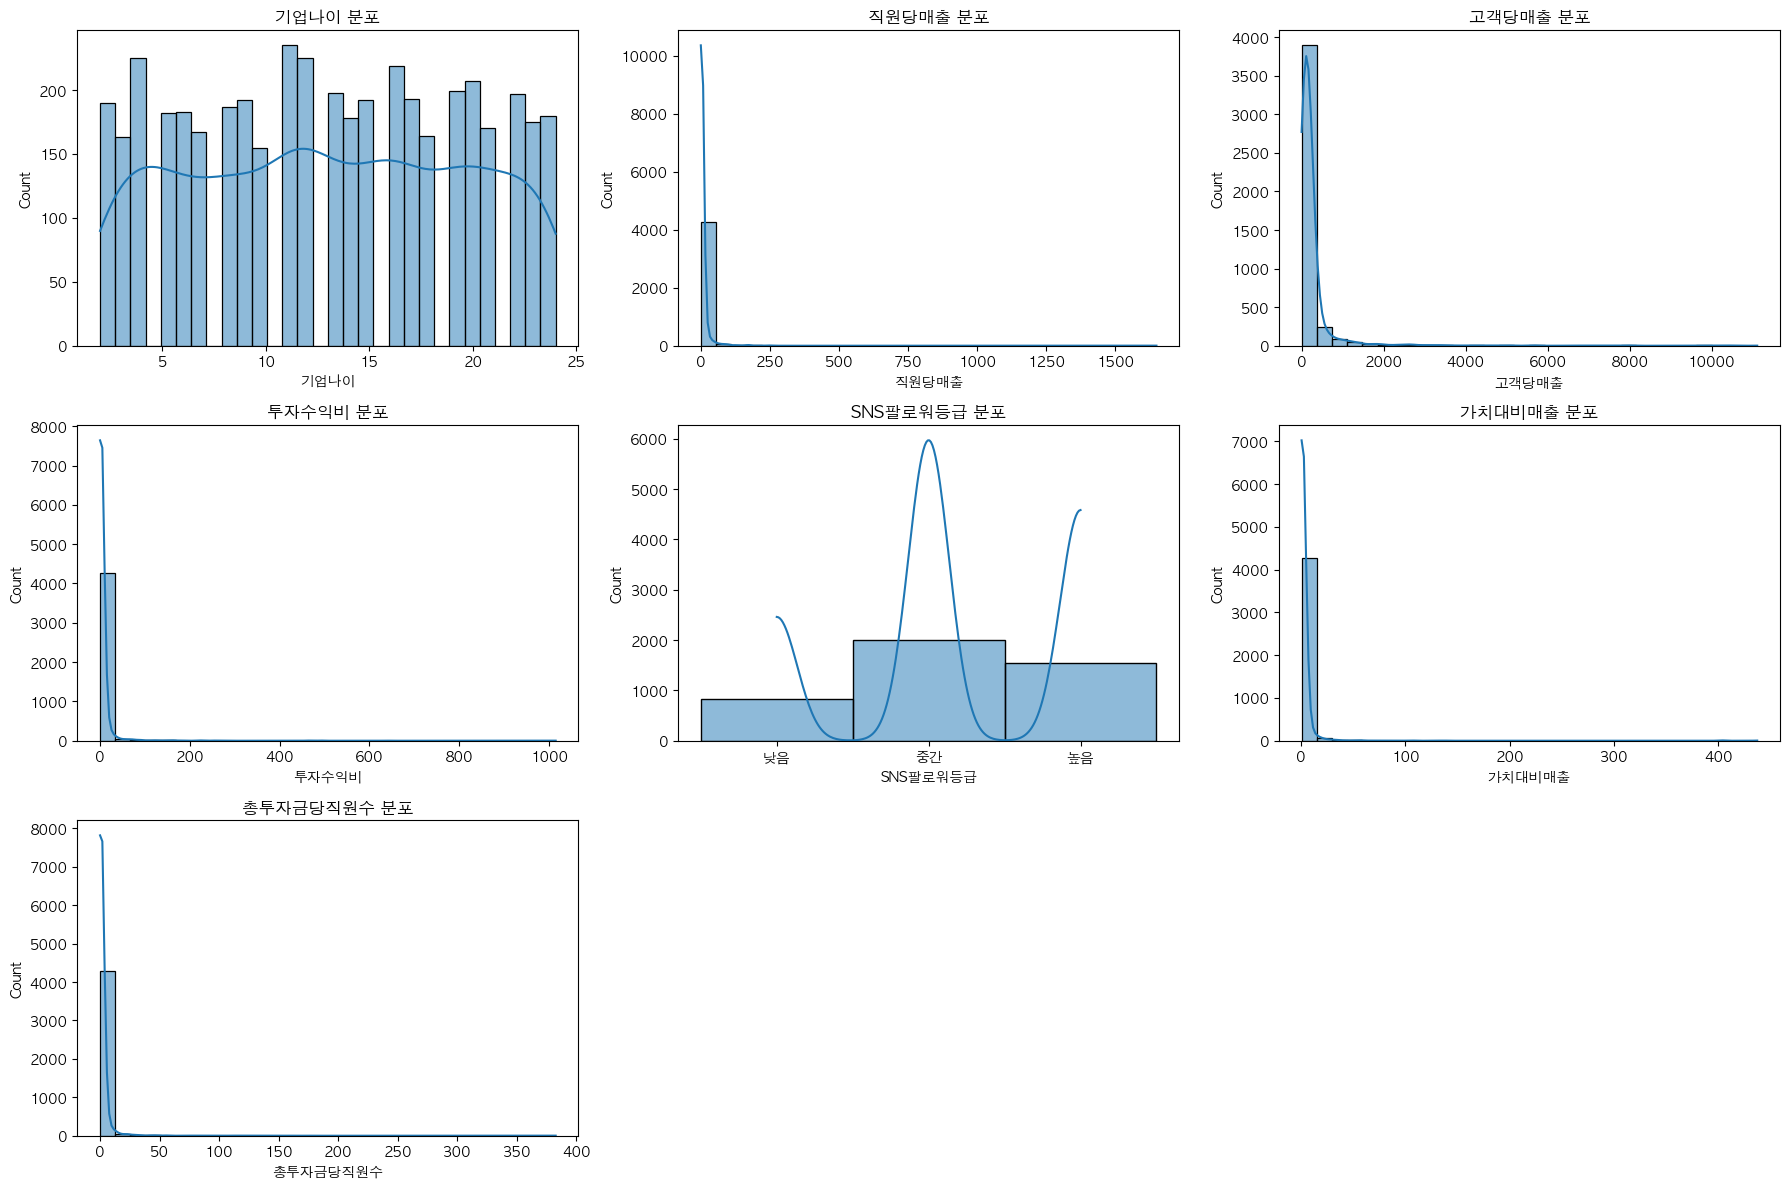

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
for i, col in enumerate(derived_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

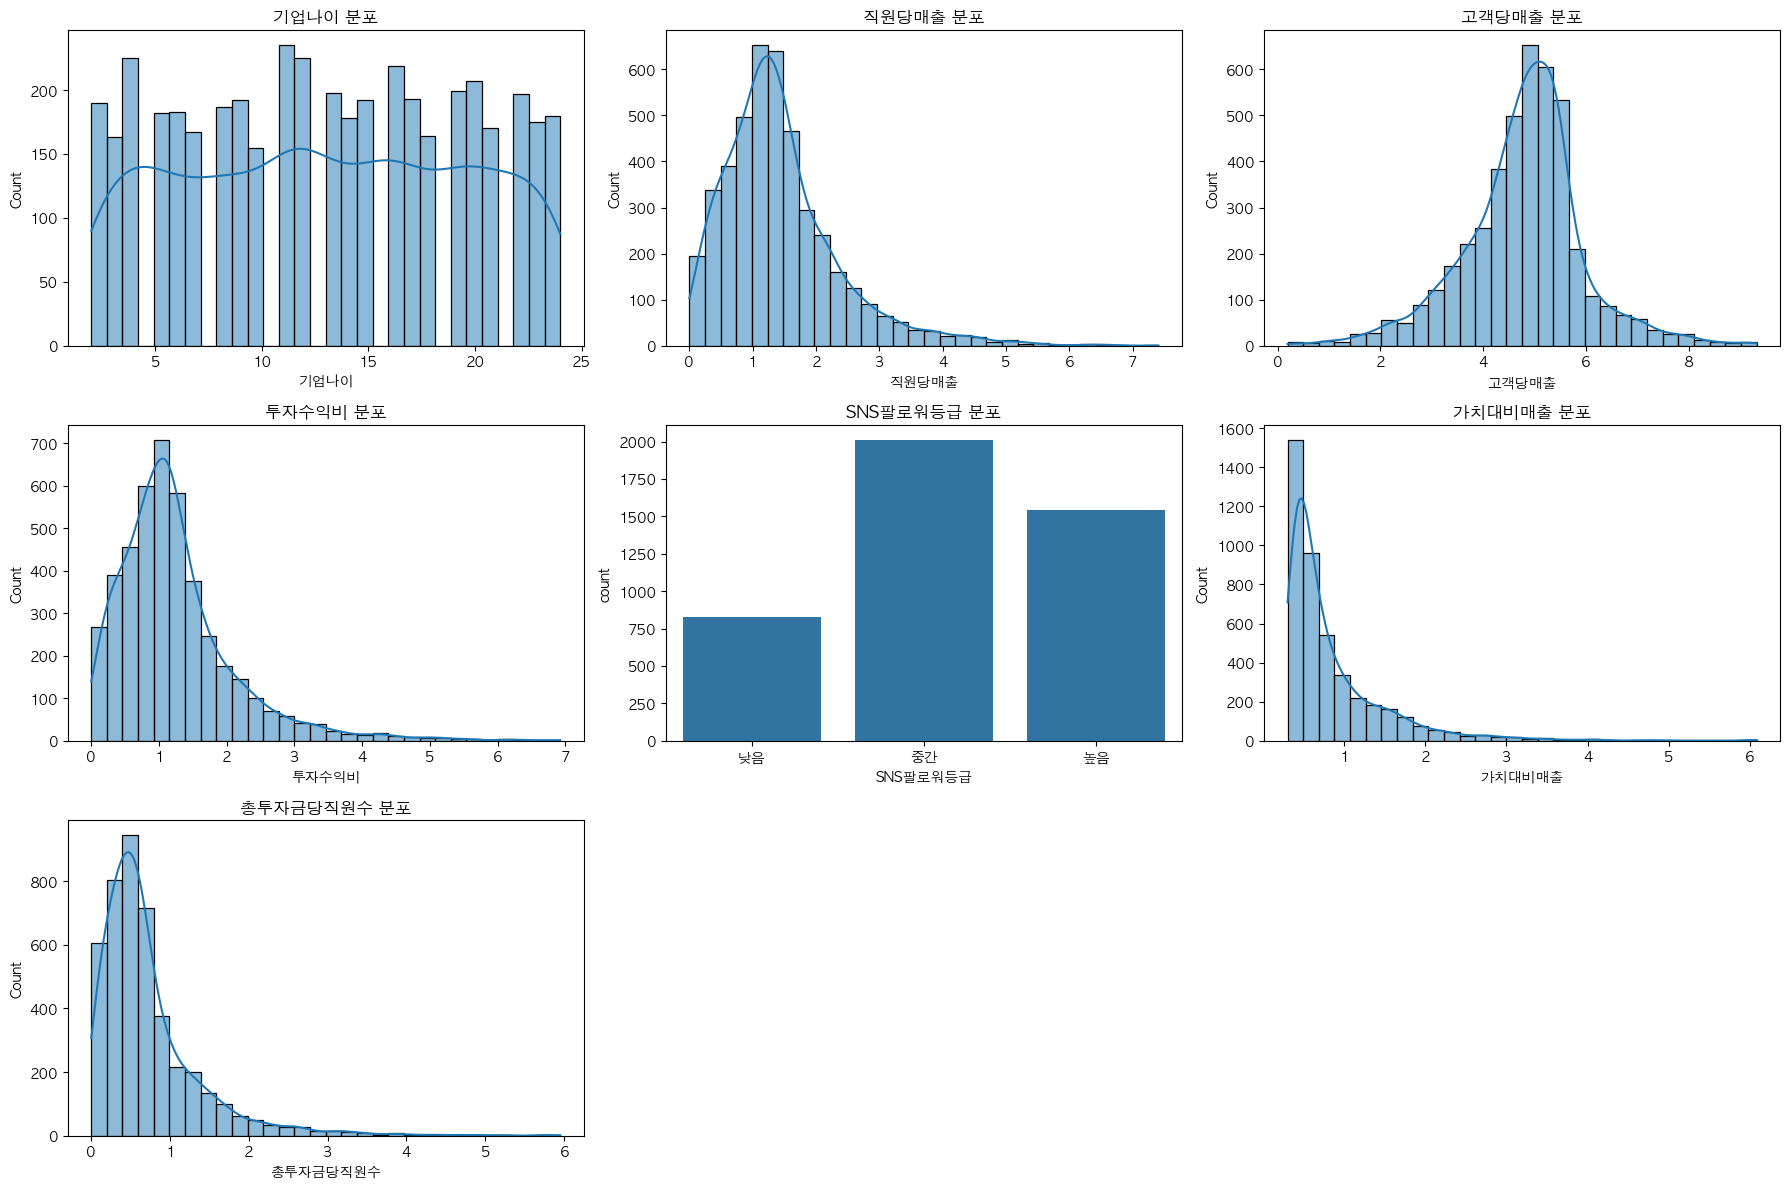

In [41]:

# 2. Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ Î≥ÄÏàò
log_cols = ['ÏßÅÏõêÎãπÎß§Ï∂ú', 'Í≥†Í∞ùÎãπÎß§Ï∂ú', 'Ìà¨ÏûêÏàòÏùµÎπÑ', 'Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú', 'Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò']

# 3. Î°úÍ∑∏ Î≥ÄÌôò Ìï®Ïàò
def log_transform_columns(df, columns):
    df_copy = df.copy()
    for col in columns:
        # 0 Ïù¥Ìïò Í∞í ÏûàÎäî Í≤ΩÏö∞ ÏÉùÎûµ
        if (df_copy[col] > 0).all():
            df_copy[col] = np.log1p(df_copy[col])
        else:
            print(f"{col}: 0 Ïù¥Ìïò Í∞í Ï°¥Ïû¨ ‚Üí Î°úÍ∑∏ Î≥ÄÌôò ÏÉùÎûµ")
    return df_copy

# 4. Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©
train_log = log_transform_columns(train, log_cols)

# 5. ÌååÏÉùÎ≥ÄÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Í∏∞Ï§Ä)
plt.figure(figsize=(18, 12))
for i, col in enumerate(derived_cols):
    plt.subplot(3, 3, i + 1)
    # SNSÌåîÎ°úÏõåÎì±Í∏âÏùÄ Î≤îÏ£ºÌòïÏù¥ÎØÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
    if col == 'SNSÌåîÎ°úÏõåÎì±Í∏â':
        sns.countplot(x=train[col])
    else:
        sns.histplot(train_log[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} Î∂ÑÌè¨')
plt.tight_layout()
plt.show()